In [2]:
import csv
import numpy as np 
from matplotlib import pyplot as plt

In [9]:
plt.style.use('fivethirtyeight')

# using the csv reader to open the file
with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    row = next(csv_reader)
    print(row)
    print(row['LanguagesWorkedWith'])
    print(row['LanguagesWorkedWith'].split(';'))

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])
HTML/CSS;Java;JavaScript;Python
['HTML/CSS', 'Java', 'JavaScript', 'Python']


In [11]:
from collections import Counter

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    language_counter = Counter()
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
print(language_counter)        

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [12]:
# we want 15 most common language
language_counter.most_common(15)
# we will get the tuple with language and the number of times it occured

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

In [14]:
# we want the language on one axes and count on another so we need to splot the tuples 
# this could be done with zip and unpacking but this way is very clear
languages =[]
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
print(languages)    
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


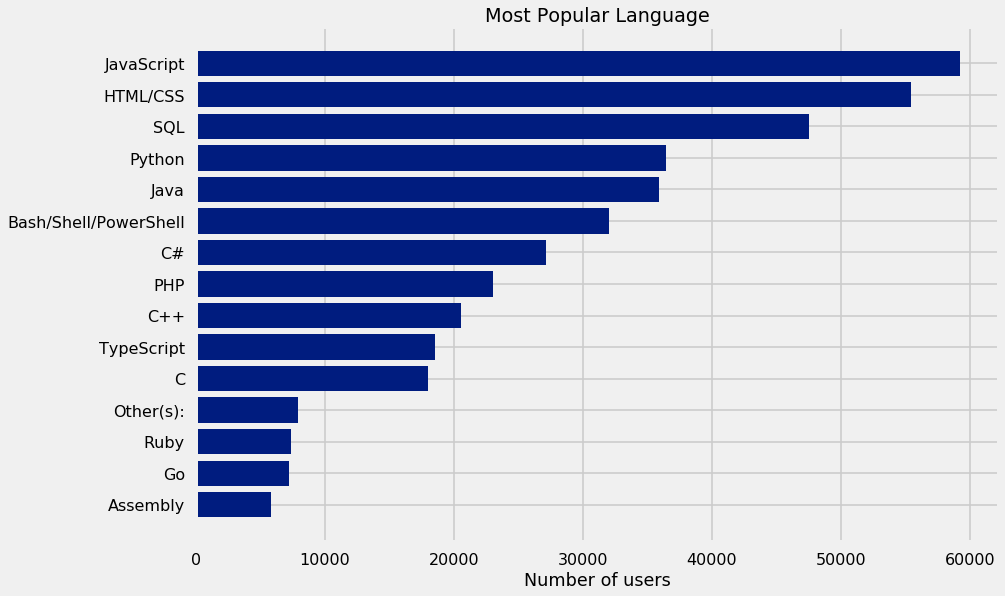

In [23]:
# lets plot it 
plt.style.use('seaborn-dark-palette')

languages.reverse()
popularity.reverse()
plt.barh(languages,popularity)
plt.title('Most Popular Language')
#plt.ylabel('Language')
plt.xlabel('Number of users')
plt.show()

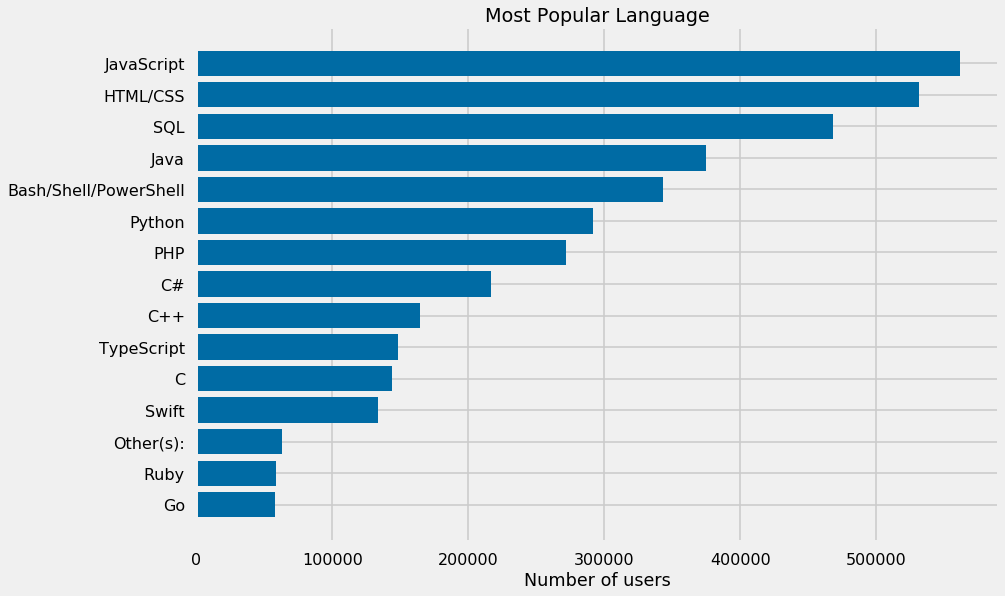

In [31]:
#do this using pandas
import pandas as pd

data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

langueage_counter = Counter()
for response in lang_responses:
    language_counter.update(response.split(';'))
    
languages, popularity = map(list,zip(*language_counter.most_common(15)))

    
plt.style.use('tableau-colorblind10')

languages.reverse()
popularity.reverse()
plt.barh(languages,popularity)
plt.title('Most Popular Language')
#plt.ylabel('Language')
plt.xlabel('Number of users')
plt.show()    